### Importing the required libraries

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

### Making the dataset

We are using the make_blobs function from sklearn to make a dataset of 100 points having two classes x1 and x2


In [2]:
X, Y = make_blobs(n_samples=100, centers=2, n_features=2)
X = pd.DataFrame(X)
X.columns = ['x1', 'x2']
X.head()


,x1,x2
0,10.073436,0.477208
1,-9.442804,4.313472
2,-8.620219,5.292283
3,9.206756,-0.385205
4,9.115195,0.677334


Scatter plotting the generated dataset

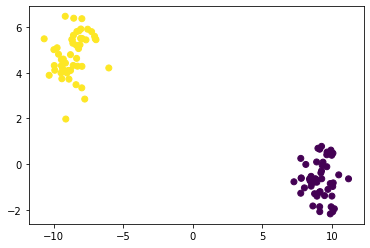

In [3]:
#plot x1 and x2
plt.scatter(X.x1, X.x2, c=Y)
plt.show()

Defining the sigmoid function 

$$ \sigma(z) = \frac{1} {1 + e^{-z}}$$

In [4]:
#sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

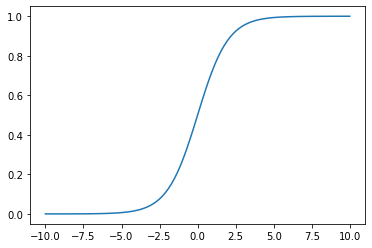

In [5]:
#plot the logistic function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### Logistic regression using cross entropy

We have chosen the initial value of $\theta$ to be random and a bias of 0. The learning rate ($\alpha$) is set to a small value of 0.001 and epochs value of 1000. For our logistic model, we define the hypothesis as following:

$$ h(x) = \sigma(\theta^TX+b) $$

We are using the cross entropy loss function for our gradient descent that is defined as follows:

$$ L = - {(y\log(h) + (1 - y)\log(1 - h))} $$

Then after each iteration of gradient descent we are updating theta follows:

$$ d\theta = \frac{1}{m}(h-y).X $$
$$ \theta = \theta - \alpha. d\theta^T $$

And updating the bias as follows:

$$ db = \frac{1}{m}(h - y)$$
$$ b = b - \alpha. db$$


In [6]:
def logistic_regression(X, y, learning_rate=0.001, epochs=1000):
    #initialize theta
    theta = np.random.randn(X.shape[1])
    m = len(y)
    bias=0
    costArr = []
    iters = 0
    while iters < epochs:
        h = sigmoid((np.dot(X, theta)+bias))
        #cross entropy loss function
        cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        costArr.append(cost)
        dw = (1 / m) * np.dot( h - y, X)
        db = (1 / m) * np.sum(h - y)
        theta = theta - learning_rate * dw.T
        bias = bias - learning_rate * db
        iters += 1
        if iters%100==0:
            print("Iteration: ", iters, " Cost: ", cost)
    return theta, costArr, bias

### Plotting the loss function 

The plot below shows the loss after every 100 iterations through the dataset

In [7]:
random.seed(1)
theta, costArr, bias = logistic_regression(X, Y)

Iteration:  100  Cost:  0.7499203240980415
Iteration:  200  Cost:  0.20861545824455177
Iteration:  300  Cost:  0.09684010226565849
Iteration:  400  Cost:  0.05922526190061917
Iteration:  500  Cost:  0.04174510281257764
Iteration:  600  Cost:  0.031937307642027075
Iteration:  700  Cost:  0.025743831031176716
Iteration:  800  Cost:  0.021508083102774522
Iteration:  900  Cost:  0.01844139495542797
Iteration:  1000  Cost:  0.01612459410557511


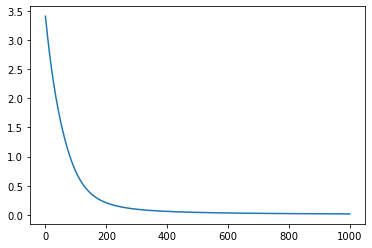

In [8]:
#plotting the cost array
plt.plot(costArr)
plt.show()

### Plotting the Predictions

The plot below visualizes the learnt prediction on the scatter plot of the input training dataset and the line showing the classification of data.

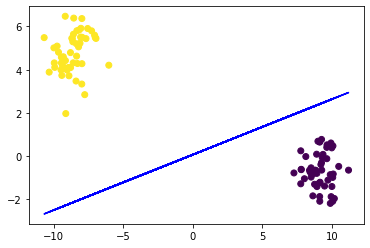

In [9]:
plt.scatter(X.x1, X.x2, c=Y)
plt.plot(X.x1, -(theta[0]*X.x1+bias)/theta[1], 'b')
plt.show()


In [10]:
def predict(X, theta):
    if sigmoid(np.dot(X, theta)) > 0.5:
        return 1 
    else:
        return 0